In [163]:
from systems.parse import parse
from systems.viz import as_dot
from IPython.core.display import HTML
import pandas as pd
import matplotlib.pyplot as plt

In [164]:
spec = """
[Hires] > Developers(10) @ 5
[Plans] > Changes @ (Developers-Incidents) * 2
Changes > Latent(1000) @ Conversion(1 / (1 + Remediated))
Latent > Incidents @ 10
Incidents > Mitigated @ Rate(1 + (Developers / 100))
Mitigated > Remediated @ 1
"""
model = parse(spec)

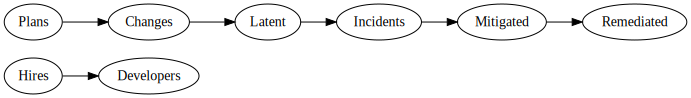

In [165]:
as_dot(model)

In [166]:
results = model.run(rounds=10)
rendered = model.render_html(results)
HTML(rendered)
#rendered.replace('\n','').replace("<table>", "<table class=\"table table-bordered\">")

Round,Developers,Changes,Latent,Incidents,Mitigated,Remediated
0,10,0,1000,0,0,0
1,15,20,990,10,0,0
2,20,12.3,1000,18.85,1.15,0
3,25,4.699999999999996,1002,27.650000000000002,1.3499999999999999,1
4,30,-2.8000000000000043,994,36.400000000000006,1.5999999999999999,2
5,35,-10.200000000000017,983,45.10000000000001,1.9,3
6,40,-17.500000000000014,970,53.75000000000001,2.25,4
7,45,-24.700000000000017,956,62.35000000000001,2.65,5
8,50,-31.80000000000001,941,70.9,3.0999999999999996,6
9,55,-38.80000000000001,926,79.4,3.5999999999999996,7


<Figure size 432x288 with 0 Axes>

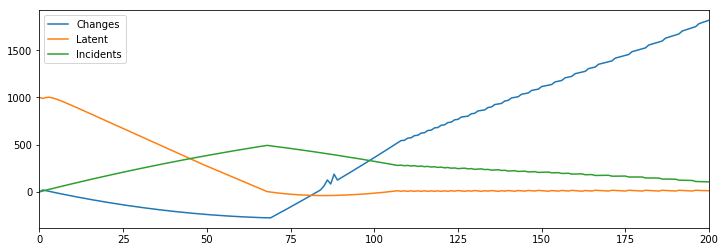

In [167]:

plt.close('all')

results = model.run(rounds=200)

df = pd.DataFrame.from_records(results, columns=['Changes', 'Latent', 'Incidents'])
df.cumsum()
plt.figure();
df.plot(figsize=(12, 4));